In [9]:
%pip install EMD-signal

Note: you may need to restart the kernel to use updated packages.


# FABEMD

Image shape:  (4096, 3255, 3)
Gray image shape:  (4096, 3255)
Resized gray image shape:  (256, 256)


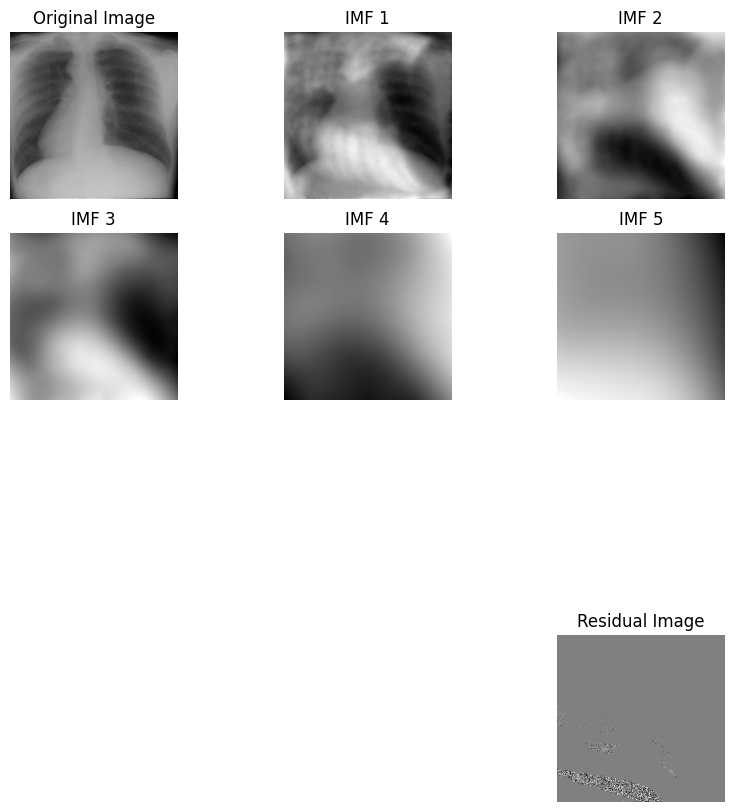

In [25]:
import cv2
import numpy as np
from PyEMD import BEMD

# Load the CXR image
image_path = "image_sample/1-IMA-01B_Thorax_AP.tiff"
image = cv2.imread(image_path)

# describe the image
print("Image shape: ", image.shape)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# describe the gray image
print("Gray image shape: ", gray_image.shape)

# reshape the image to minimum value of the image
gray_image = cv2.resize(gray_image, (256, 256))

# describe the gray image
print("Resized gray image shape: ", gray_image.shape)

# Initialize BEMD
bemd = BEMD.BEMD()

# Perform the decomposition
IMFs = bemd.bemd(gray_image, max_imf=10)

# Calculate the residual image
residual = gray_image - np.sum(IMFs, axis=0)

# Display the results
import matplotlib.pyplot as plt

# Plot the original image
plt.figure(figsize=(10, 10))
plt.subplot(4, 3, 1)
plt.imshow(gray_image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Plot the IMFs
for i, imf in enumerate(IMFs):
    plt.subplot(4, 3, i + 2)
    plt.imshow(imf, cmap="gray")
    plt.title(f"IMF {i + 1}")
    plt.axis("off")

# Plot the residual image
plt.subplot(4, 3, 12)
plt.imshow(residual, cmap="gray")
plt.title("Residual Image")
plt.axis("off")

plt.show()